In [3]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


### Dimension reduction using PCA. 


In [4]:
#Run the following code.
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


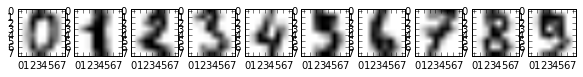

In [5]:
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

#### We have 64-dimension feature space(excluding y) X
Wwe need to use PCA to transform X to Xproj.Plot the explained variance for each eigenvector(direction) from high to low in one scatter plot. 

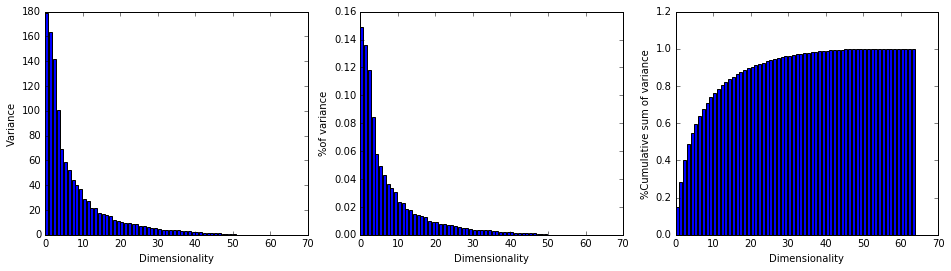

In [6]:
n = 64
pca = PCA(n)
Xproj = pca.fit_transform(X)


eigenvalues = pca.explained_variance_
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)

ax.bar(np.arange(n), eigenvalues);
ax.set_xlabel("Dimensionality")
ax.set_ylabel("Variance")


ratio = pca.explained_variance_ratio_
ax2 = fig.add_subplot(1,3,2)
ax2.bar(np.arange(n), ratio);
ax2.set_xlabel("Dimensionality")
ax2.set_ylabel("%of variance")

sumRatio = np.cumsum(pca.explained_variance_ratio_)
ax3 = fig.add_subplot(1,3,3)
ax3.bar(np.arange(n), sumRatio);
ax3.set_xlabel("Dimensionality")
ax3.set_ylabel("%Cumulative sum of variance")



Total variance of X? How many eigenvectors(directions) do we need to choose if we want to preserve 90% variance of the original data.


In [7]:
totalVar = np.sum(np.var(X,0))
print 'Total variance of X: %.2f' %totalVar

eigenvectorCumsum90 = 64 - sum(np.cumsum(pca.explained_variance_ratio_) >= .90)
print 'To preserve 90% percent of the variance we need to keep {:d} eigenvectors'.format(eigenvectorCumsum90)

Total variance of X: 1201.48
To preserve 90% percent of the variance we need to keep 20 eigenvectors


#### Reduce the dimensionality of digits data set from 64 to 3.Visulize the transformed space on a 3 dimensional plot. Color the points with respect to their label y.



[]

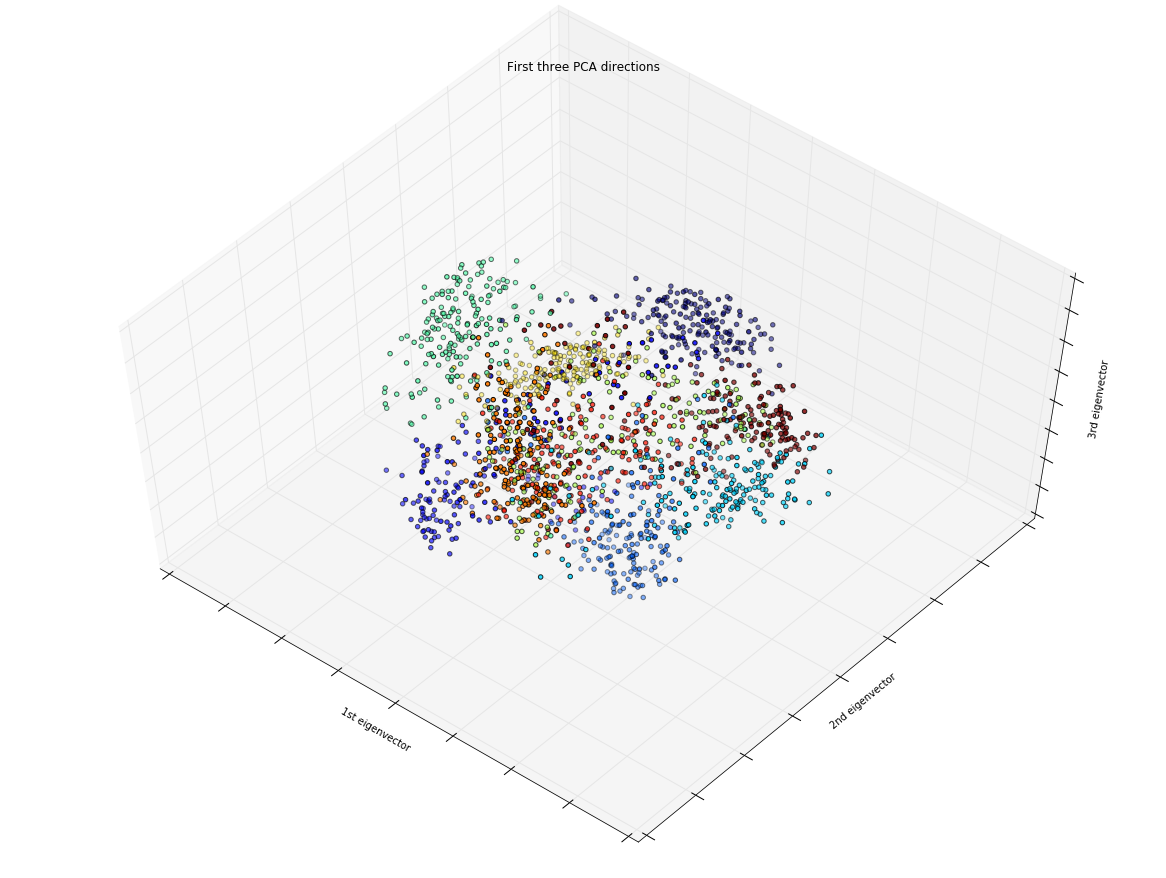

In [8]:
n = 3
pca = PCA(n)
Xproj = pca.fit_transform(X)

fig = plt.figure(figsize=(16,12))

ax2 = fig.add_subplot(1,2,2)
ax2 = Axes3D(fig, elev=-120, azim=50)
ax2.scatter(Xproj[:, 0], Xproj[:, 1], Xproj[:, 2], c=y)
ax2.set_title("First three PCA directions")
ax2.set_xlabel("1st eigenvector")
ax2.w_xaxis.set_ticklabels([])
ax2.set_ylabel("2nd eigenvector")
ax2.w_yaxis.set_ticklabels([])
ax2.set_zlabel("3rd eigenvector")
ax2.w_zaxis.set_ticklabels([])

